In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import statsmodels.api as sm

df = pd.read_csv('C:/Users/StarKid/Desktop/Class/Fall_2023/data_201/project/credit_risk.csv')


In [2]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4


In [3]:
# Display basic information and the first few rows of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_amnt                   32581 non-null  int64  
 6   loan_int_rate               29465 non-null  float64
 7   loan_status                 32581 non-null  int64  
 8   loan_percent_income         32581 non-null  float64
 9   cb_person_default_on_file   32581 non-null  object 
 10  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 2.7+ MB


In [4]:
df.describe() # describe only works on numeric columns

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [5]:
df.isna().sum() # this is to find the missing values

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [6]:
df.dropna(inplace = True)


In [7]:
df.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [8]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Apply one-hot encoding to the categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# df_encoded now contains the original data with categorical columns replaced by their one-hot encoded counterparts
df_encoded.head()

# any column that is categorical the encoder makes them into a seperate columns. 
# anywhere it is present it will be one and anywhere it will be absent it will be zero. 


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,22,59000,123.0,35000,16.02,1,0.59,3,0,0,0,1,0,0,0,0,1,0,0,1
1,21,9600,5.0,1000,11.14,0,0.10,2,0,0,1,0,0,1,0,0,0,0,1,0
2,25,9600,1.0,5500,12.87,1,0.57,3,1,0,0,0,0,0,0,1,0,0,1,0
3,23,65500,4.0,35000,15.23,1,0.53,2,0,0,0,1,0,0,0,1,0,0,1,0
4,24,54400,8.0,35000,14.27,1,0.55,4,0,0,0,1,0,0,0,1,0,0,0,1


In [9]:
df_encoded.describe(include = "all")

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_N,cb_person_default_on_file_Y
count,28638.000000,2.863800e+04,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000
mean,27.727216,6.664937e+04,4.788672,9656.493121,11.039867,0.216600,0.169488,5.793736,0.412075,0.003282,0.076542,0.508101,0.159404,0.199176,0.111670,0.184824,0.170298,0.174628,0.821810,0.178190
std,6.310441,6.235645e+04,4.154627,6329.683361,3.229372,0.411935,0.106393,4.038483,0.492217,0.057199,0.265867,0.499943,0.366058,0.399388,0.314965,0.388162,0.375901,0.379655,0.382679,0.382679
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,3.948000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,26.000000,5.595600e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
# df_encoded["loan_intent"] # not there anymore because it has been broken down into seperate columns

In [11]:
# df["loan_intent"].unique() # the reason for getting the loan

In [12]:
df_encoded.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y'],
      dtype='object')

In [13]:
# Selecting a subset of features for the regression
# For example, 'person_age', 'person_income', and 'loan_amnt' as predictors
X = df_encoded.drop(columns = "loan_int_rate") # drop the loan_int_rate and retain every other columns. to be used as independent features or predictors
y = df_encoded['loan_int_rate']

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print out the statistics
print(model.summary())

# You can use the model for predictions or further analysis


                            OLS Regression Results                            
Dep. Variable:          loan_int_rate   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     910.2
Date:                Thu, 30 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:52:38   Log-Likelihood:                -68317.
No. Observations:               28638   AIC:                         1.367e+05
Df Residuals:                   28621   BIC:                         1.368e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

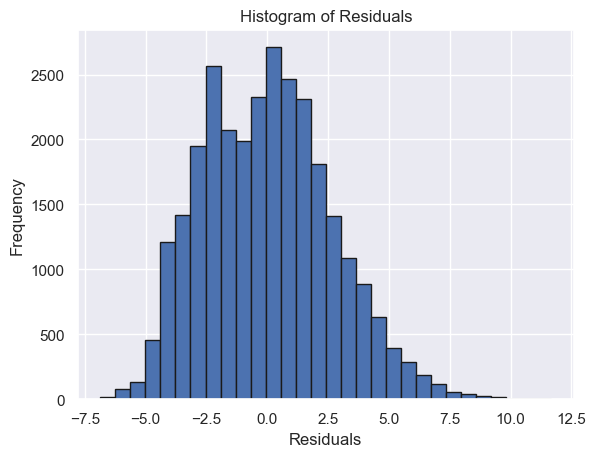

In [14]:
residuals = model.resid

# Plot histogram of residuals
plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

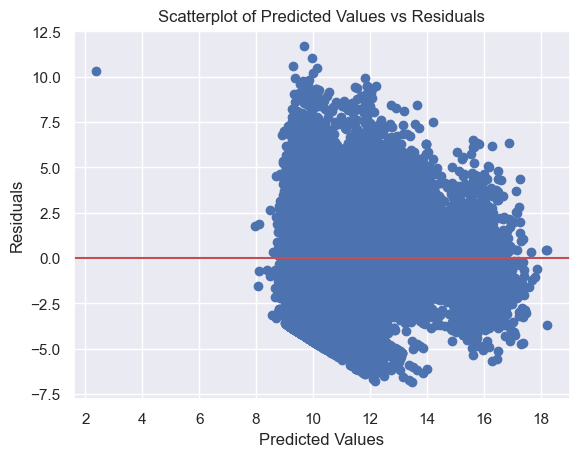

In [15]:
predicted_values = model.predict(X)

# Plot scatterplot of predicted values vs residuals
plt.scatter(predicted_values, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')  # adds a horizontal line at zero
plt.title('Scatterplot of Predicted Values vs Residuals')
plt.show()

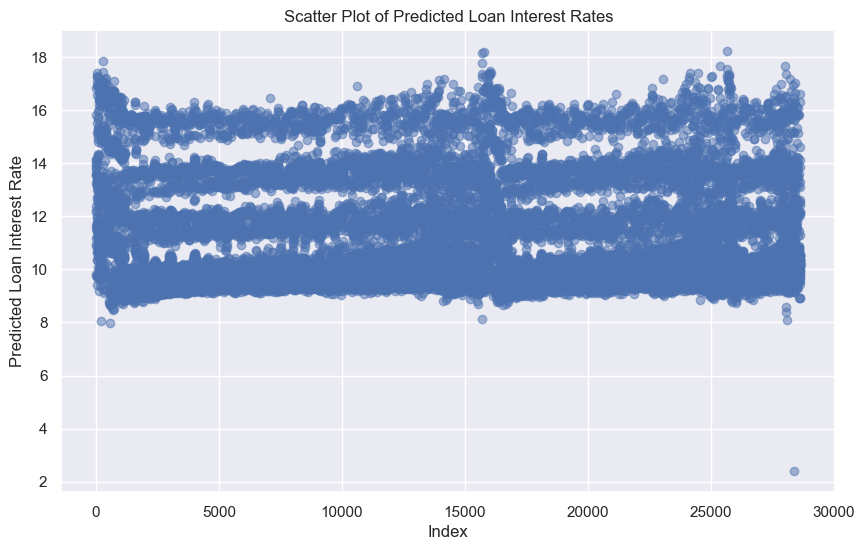

In [16]:
predicted_values = model.predict(X)

# Plot the scatter plot of predicted values
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
plt.scatter(range(len(predicted_values)), predicted_values, alpha=0.5)  # alpha for transparency
plt.xlabel('Index')
plt.ylabel('Predicted Loan Interest Rate')
plt.title('Scatter Plot of Predicted Loan Interest Rates')
plt.show()

In [17]:
## As we dive deeper into the analysis the loan is about starts around  6.15%. That is the constant.  And depending on the
# coffienent the loan rates either increase or decrease. The biggest factor for a loan to decrease is person income. The
# more money you make the less the credit risk. That makes sense when your wealthy you tend to have more resources there for
# are able to pay off your loan and become less of credit risk.  You can see the p value that is associated with the coeffcient
# telling you that its statistically significant

# f-statistic is 910.2 and that's correlated with the p-value of 0 telling you its statistically signifcant.

# r-squared and adjusted r squared is 0.337 bascially means that 33.7% is the variabity of the loan interest rates.

# Factors that decrease interest rate are person's income, loan percent income.

# Factors that affect the loan rates are loan amount, previous credit default.

# The intent of the is another factor. These include debt consolidation, education, home improvement, medical, personal,
# and venture. Out of all of these medical loan rates are much lower thatn the rest and starting your own venture is the most
# expensive because of the risk involved in starting your own business.


 